<a href="https://colab.research.google.com/github/yeyorg/Cifar10-CNN/blob/main/Cifar_10_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cifar-10

Cifar 10 es un dataset de sesenta mil imágenes a color de 32x32 píxeles divididas en 10 clases diferentes y exclusivas, es decir, ninguna clase es contenida por otra o se solapa de alguna manera, están divididas así:


<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>Airplane</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Automobile</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Bird</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Cat</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Deer</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Dog</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Frog</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Horse</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Ship</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Truck</td>
  </tr>
</table>

El objetivo es generar una red neuronal convolucional que pueda clasificar correctamente las imágenes del dataset dentro de las 10 categorías dadas. 

# Librerias

In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import MaxPooling2D
from keras.utils.vis_utils import plot_model

#Cargar Dataset

In [2]:
# Importaremos el dataset con TensorFlow 
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

170508288/170498071 [==============================] - 12s 0us/step
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


# Visualización del dataset

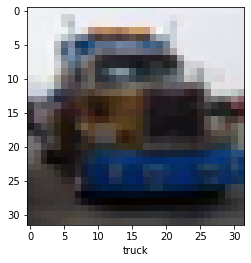

In [3]:
n=np.random.randint(50000) #Generamos un núnero entero aleatorio para plotear una imagen aleatoria

label_dict={0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'} 
#Generamos un dictionario que nos permitirá leer con facilidad las etiquetas

#Empezamos el proceso para mostrar la imagen
plt.figure()
plt.imshow(x_train[n])
plt.grid(False)
label = int(y_train[n]) # Leemos la etiqueta (un número) de la imgen seleccionada
plt.xlabel(str(label_dict[label]))  # Ponemos la etiqueta en el eje x haciendo uso del diccionario
plt.show()  #Mostramos la imagen

# Tratamiento de datos

## Normalización

In [4]:
# Como el formato de imagen es Unit8 sabemos que el valor 
# de cada pixel va desde 0 a 255 por lo que la noramlización 
# resulta de dividir los valores de cada pixel entre 255

def normalizar():
  x_train_n = x_train.reshape((50000,32,32,3))
  x_train_n = x_train.astype('float32')/255
  x_test_n = x_test.reshape((10000,32,32,3))
  x_test_n = x_test.astype('float32')/255
  print("Los datos han sido normalizados")
  return x_train_n, x_test_n

## Visualizaci[on de datos normalizados

Los datos han sido normalizados


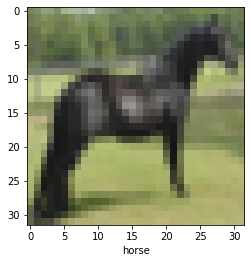

In [5]:
(x_train_n, x_test_n) = normalizar()
n=np.random.randint(50000)
plt.figure()
plt.imshow(x_train_n[n])
plt.grid(False)
label = int(y_train[n])
plt.xlabel(str(label_dict[label]))
plt.show()

## One hot Encoding

In [6]:
y_train_one = np_utils.to_categorical(y_train, 10)
print(y_train.shape)
y_test_one = np_utils.to_categorical(y_test, 10)
print(y_test.shape)

(50000, 1)
(10000, 1)


# Modelo CNN

In [7]:
def modelo():
  # create model
  input_shape = (32, 32,3) #x_train.shape

  model=Sequential()
 # Capa convolucional 1
  model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=input_shape, activation='relu',padding='same'))

 # MaxPool, reduce la imagen de 32x32 a la imagen de 16x16
  model.add(MaxPooling2D(pool_size=(2,2)))

 # Capa convolucional 2
  model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'))

 # Unirse a Dropout para evitar el overfiting
  model.add(Dropout(0.25))

 # MaxPool
  model.add(MaxPooling2D(pool_size=(2,2)))

 #Construye una red profunda
         #Construye una capa plana
  model.add(Flatten())
  model.add(Dropout(0.25))
         # Construir capa oculta
  model.add(Dense(1024,activation='relu'))
  model.add(Dropout(0.25))    
         # Construir capa de salida
  model.add(Dense(10,activation='softmax'))
  
  model.summary()
  plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4096)              0

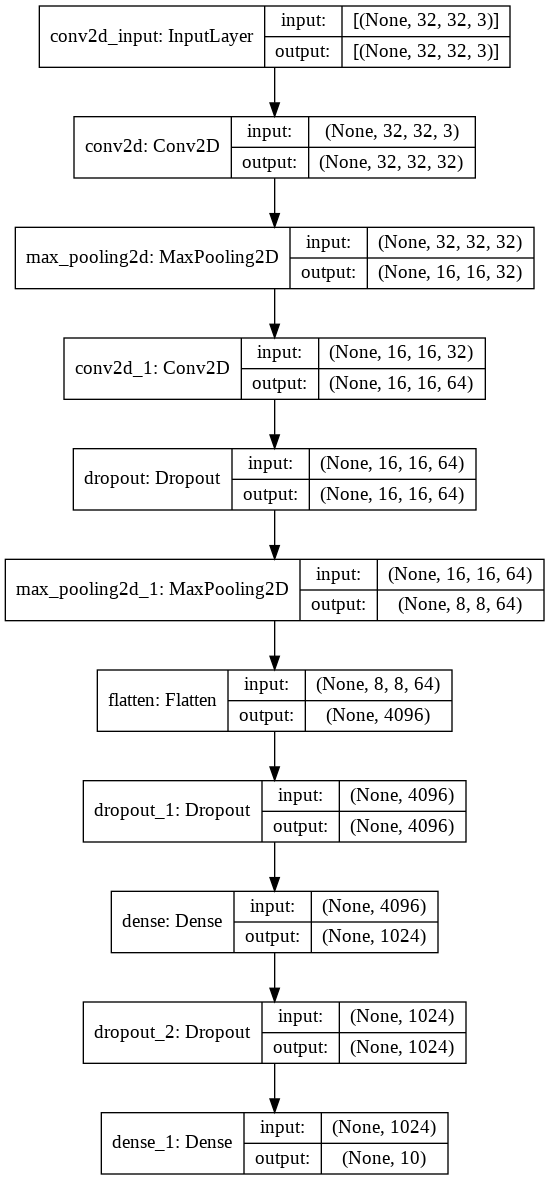

In [8]:
model = 0
model = modelo()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [9]:
history = model.fit(x_train_n, y_train_one, validation_data=(x_test_n, y_test_one), epochs=20, batch_size=100, verbose=1, shuffle=True)

Epoch 1/20
500/500 [==============================] - 39s 15ms/step - loss: 1.4554 - accuracy: 0.4747 - val_loss: 1.1843 - val_accuracy: 0.5937
Epoch 2/20
500/500 [==============================] - 7s 14ms/step - loss: 1.1020 - accuracy: 0.6082 - val_loss: 1.0440 - val_accuracy: 0.6437
Epoch 3/20
500/500 [==============================] - 7s 14ms/step - loss: 0.9536 - accuracy: 0.6654 - val_loss: 0.9211 - val_accuracy: 0.6895
Epoch 4/20
500/500 [==============================] - 7s 14ms/step - loss: 0.8369 - accuracy: 0.7068 - val_loss: 0.8752 - val_accuracy: 0.6991
Epoch 5/20
500/500 [==============================] - 7s 14ms/step - loss: 0.7462 - accuracy: 0.7385 - val_loss: 0.8223 - val_accuracy: 0.7206
Epoch 6/20
500/500 [==============================] - 7s 14ms/step - loss: 0.6661 - accuracy: 0.7682 - val_loss: 0.8022 - val_accuracy: 0.7212
Epoch 7/20
500/500 [==============================] - 7s 14ms/step - loss: 0.5914 - accuracy: 0.7928 - val_loss: 0.7664 - val_accuracy: 0.735

# Resultados del entrenamiento

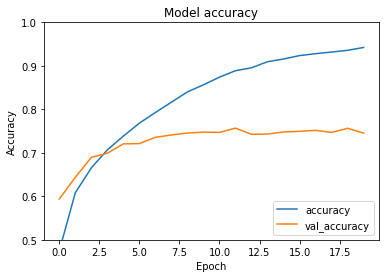

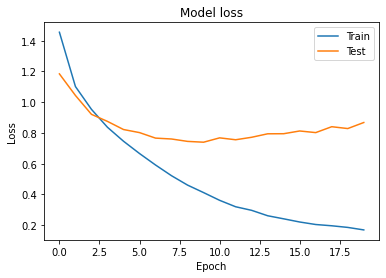

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [14]:
Score = model.evaluate(x_test_n, y_test_one, verbose=0)[1]

print("La precision del modelo es: "+str(np.round(Score,decimals=4)))

outputTrain=model.predict(x_test)

La precision del modelo es: 0.7453


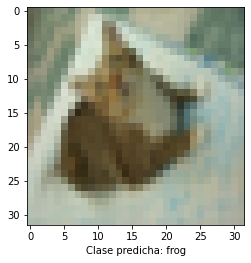

La prediccion es incorrecta
clase predicha: frog
clase original: cat


In [39]:
n=np.random.randint(10000)
img = x_test_n[n]
img = (np.expand_dims(img,0))
predictions_single = model.predict(img)
np.argmax(predictions_single[0])

plt.figure()
plt.imshow(x_test_n[n])
plt.grid(False)
label = int(np.argmax(predictions_single[0]))
plt.xlabel("Clase predicha: "+str(label_dict[label]))
plt.show()

prediction = int(np.argmax(predictions_single[0]))
original = int(y_test[n])

if prediction == original:
  print("La prediccion es correcta")
else:
  print("La prediccion es incorrecta")
  print("clase predicha: " + label_dict[int(np.argmax(predictions_single[0]))])
  print("clase original: " + label_dict[int((y_test[n]))])

In [44]:
  def plot_confusion_matrix(cm, num_classes,normalize=False,title='Matrix de Confusion',cmap=plt.cm.Blues):
      
      import itertools
      
      classes = ['0', '1', '2', '3','4', '5', '6', '7', '8',  '9']

      plt.figure(figsize = (8,8))
      plt.imshow(cm, interpolation='nearest', cmap=cmap)
      plt.title(title)
      plt.colorbar()
      tick_marks = np.arange(len(classes))
      plt.xticks(tick_marks, classes, rotation=90)
      plt.yticks(tick_marks, classes)
      if normalize:
          cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

      thresh = cm.max() / 2.
      for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
          plt.text(j, i, cm[i, j],
                   horizontalalignment="center",
                   color="white" if cm[i, j] > thresh else "black")
      plt.tight_layout()
      plt.ylabel('Original')
      plt.xlabel('Predicciones')

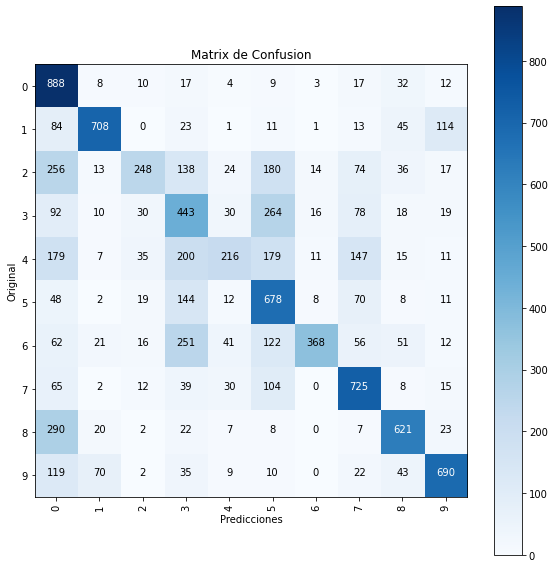

In [45]:
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(y_test_one.argmax(axis=1),outputTrain.argmax(axis=1))

plot_confusion_matrix(confusion_mtx, 10)